# Florida UO2 ThO2 Mixture Assignment: 30Oct

In [1]:
%matplotlib inline
import openmc
import math
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
while True:
    try:
        print('Please select whether you want to do one run with user inputs (1) or a continuous run (2).')
        userInputTF = int(input())
    except ValueError:
        print("Please type in a valid number (1 or 2)")
        continue
    if userInputTF not in (1,2):
        print("Please type in a valid entry (1 or 2)")
        continue
    else:
        break
if userInputTF == 1: 
    print("Single Run, User Input")
elif userInputTF == 2:
    print("Continuous Run")

Please select whether you want to do one run with user inputs (1) or a continuous run (2).


 2


Continuous Run


## User Input Test Function

Desired UO2 Mass Density [g/cc]? (Press Enter key for default for default value of 10.45 g/cc) 
Desired number of enrichments tested? (Press Enter key for default value of 2) 
Desired number of fuel mixtures tested? (Press Enter key for default value of 2) 
Starting level of UO2 Enrichment (%)? (Press Enter key for default for default value of 5%) 
Final level of UO2 Enrichment (%)? (Press Enter key for default for default value of 19.75%) 
Starting TOX Fuel Uranium Fraction (%)? (Press Enter key for default for default value of 5%) 
Final TOX Fuel Uranium Fraction (%)? (Press Enter key for default for default value of 95%) 


[0.05   0.1975]
[0.05 0.95]
[[0.0 0.0 0.0]
 [0.0 0.0 0.0]
 [0.0 0.0 0.0]]
Material
	ID             =	1
	Name           =	fuel
	Temperature    =	None
	Density        =	9.734933973589436 [g/cm3]
	Volume         =	1 [cm^3]
	S(a,b) Tables  
	Nuclides       
	Th232          =	0.31701018079059673 [ao]
	U235           =	0.0008260493951034017 [ao]
	U238           =	0.01549710314763314 [ao]
	O16            =	0.666414     [ao]
	O17            =	0.00025266666666666666 [ao]

Material
	ID             =	2
	Name           =	graph
	Temperature    =	None
	Density        =	2.26 [g/cm3]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       
	C0             =	1.0          [ao]

Material
	ID             =	3
	Name           =	hel_Cool
	Temperature    =	None
	Density        =	0.000178 [g/cm3]
	Volume         =	None [cm^3]
	S(a,b) Tables  
	Nuclides       
	He3            =	2e-06        [ao]
	He4            =	0.999998     [ao]

Material
	ID             =	4
	Name           =	fuel(0.0384)-graph(0.6016)

/home/karlflorida/anaconda3/envs/openmc-env/lib/python3.11/site-packages/openmc/mixin.py:70: IDWarning: Another Tally instance already exists with id=1.
  warn(msg, IDWarning)


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

RuntimeError: Failed to open HDF5 file with mode 'w': summary.h5

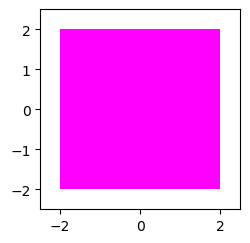

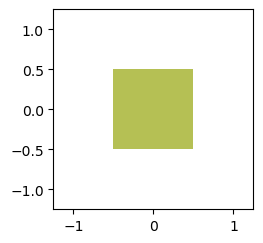

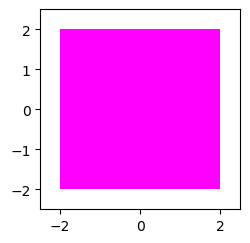

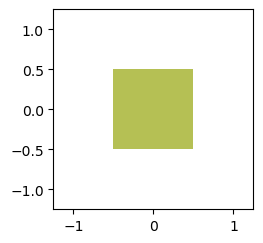

In [3]:
if userInputTF == 1:
    while True:
        try:
            UO2MassRho = float(input('Desired UO2 Mass Density [g/cc]? (Press Enter key for default for default value of 10.45 g/cc)') or 10.45)
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        else:
            break
    while True:
        try:
            UO2Enrichment = float(input('Desired level of UO2 Enrichment (%)? (Press Enter key for default for default value of 5%)') or 5)/100
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        else:
            break
    while True:
        try:
            pctLEU = float(input('Desired TOX Fuel Uranium Fraction (%)? (Press Enter key for default for default value of 40%)') or 40)/100
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        else:
            break
    print('UO2 Mass Density: ', UO2MassRho, 'g/cc')
    print('UO2 Enrichment: ', UO2Enrichment*100, '%')
    print('Fuel UO2 Percent: ', pctLEU*100, '%')
    print('Fuel Thorium Percent: ', (1 - pctLEU)*100, '%')

elif userInputTF == 2:
    while True:
        try:
            UO2MassRho = float(input('Desired UO2 Mass Density [g/cc]? (Press Enter key for default for default value of 10.45 g/cc)') or 10.45)
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        else:
            break
    while True:
        try:
            enrichRunNum = int(input('Desired number of enrichments tested? (Press Enter key for default value of 2)') or 2)
        except ValueError:
            print("Please type in a valid number (must be an integer, no characters)")
            continue
        if enrichRunNum < 2:
            print("# of runs must be more than 1")
            continue
        else:
            break
    while True:
        try:
            fuelMixRunNum = int(input('Desired number of fuel mixtures tested? (Press Enter key for default value of 2)') or 2)
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        if fuelMixRunNum < 2:
            print("# of runs must be more than 1")
            continue
        else:
            break
    while True:
        try:
            UO2EnrichmentFirst = float(input('Starting level of UO2 Enrichment (%)? (Press Enter key for default for default value of 5%)') or 5)/100
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        if UO2EnrichmentFirst < 0:
            print("Value must be greater than 0.")
            continue
        else:
            break
    while True:
        try:
            UO2EnrichmentLast = float(input('Final level of UO2 Enrichment (%)? (Press Enter key for default for default value of 19.75%)') or 19.75)/100
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        if UO2EnrichmentLast <= UO2EnrichmentFirst:
            print("Final value must be greater than starting value.")
            continue
        else:
            break
    while True:
        try:
            pctLEUFirst = float(input('Starting TOX Fuel Uranium Fraction (%)? (Press Enter key for default for default value of 5%)') or 5)/100
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        if pctLEUFirst < 0:
            print("Value must be greater than 0.")
            continue
        else:
            break
    while True:
        try:
            pctLEULast = float(input('Final TOX Fuel Uranium Fraction (%)? (Press Enter key for default for default value of 95%)') or 95)/100
        except ValueError:
            print("Please type in a valid number (no characters)")
            continue
        if pctLEULast <= pctLEUFirst:
            print("Final value must be greater than starting value.")
            continue
        else:
            break

    ## Calculate Weight Percentages ##
    # Constants - via PNNL Mat'l Comp., Rev-2
    ThO2OAtomRho = 0.044247 # Oxygen Atom Density in ThO2 [atom/b-cm]
    ThO2ThAtomRho = 0.022124 # Thorium Atom Density in ThO2 [atom/b-cm]
    ThMolW = 232. # Molecular Weight of Th [g/mol]
    OMolW = 16. # Molecular Weight of O [g/mol]
    ThO2MolW = ThMolW + 2*OMolW # Molecular Weight of ThO2 [g/mol]
    U235MolW = 235. # Molecular Weight of U-235 [g/mol]
    U238MolW = 238. # Molecular Weight of U-238 [g/mol]
    ThO2MassRho = 9.7 # Mass Density of ThO2 [g/cm^3]
    graphMassRho = 2.26 # Mass Density of Graphite [g/cm^3]
    he_CoolMassRho = 0.000178 # Mass Density of He @ 293K [g/cm^3]
    avo = 0.6022 # Avogadro's Number
    
    i = 0
    j = 0
    enrichVals = np.linspace(UO2EnrichmentFirst, UO2EnrichmentLast, num=enrichRunNum, retstep=False)
    pctLEUVals = np.linspace(pctLEUFirst, pctLEULast, num=fuelMixRunNum, retstep=False)
    print(enrichVals)
    print(pctLEUVals)

    keffMatInit=np.zeros((enrichRunNum+1,fuelMixRunNum+1))
    keffMat = np.array((keffMatInit), dtype=object)
    print(keffMat)

    
    while i < enrichRunNum:
        while j < fuelMixRunNum:
            # Results of Constants and Input Parameters
            # Weight percent of Th in LEU mixture
            pctTh = 1 - pctLEUVals[j]
            # Total Mixture Density
            UThMixMassRho = (pctLEUVals[j]/UO2MassRho + pctTh/ThO2MassRho)**-1 # [g/cm]
            # UO2 Atom Densities
            UO2UMolW = ((enrichVals[i]/U235MolW) + ((1 - enrichVals[i])/U238MolW))**-1 # Molecular Weight of U in UO2 [g/mol]
            UO2MolW = UO2UMolW + 2*16 # Molecular Weight of UO2 [g/mol]
            UO2OAtomRho = (UO2MassRho/UO2MolW)*2*avo # O Atom Density in UO2 [atom/b-cm]
            UO2U235AtomRho = (enrichVals[i]*UO2MassRho*(UO2UMolW/UO2MolW)/U235MolW)*avo # U-235 Atom Density in UO2 [atom/b-cm] 
            UO2U238AtomRho = ((1 - enrichVals[i])*UO2MassRho*(UO2UMolW/UO2MolW)/U238MolW)*avo # U-238 Atom Density in UO2 [atom/b-cm]
            UO2U235AtomRhoFrac = UO2U235AtomRho/(UO2U235AtomRho+UO2U238AtomRho)
            UO2U238AtomRhoFrac = UO2U238AtomRho/(UO2U235AtomRho+UO2U238AtomRho)
            # UO2 ThO2 Mixture Atom Densities
            UThMixOAtomRho = (pctTh*UThMixMassRho/ThO2MolW)*2*avo + (pctLEUVals[j]*UThMixMassRho/UO2MolW)*2*avo # Oxygen Atom Density in Fuel Mixture [atom/b-cm]
            UThMixThAtomRho = (pctTh*UThMixMassRho/ThO2MolW)*avo # Uranium Atom Density in Fuel Mixture [atom/b-cm] 
            UThMixU235AtomRho = (pctLEUVals[j]*UThMixMassRho/UO2MolW)*avo*UO2U235AtomRhoFrac # Uranium Atom Density in Fuel Mixture [atom/b-cm]
            UThMixU238AtomRho = (pctLEUVals[j]*UThMixMassRho/UO2MolW)*avo*UO2U238AtomRhoFrac # Uranium Atom Density in Fuel Mixture [atom/b-cm]
            # UO2 ThO2 Mixture Atom Fractions
            # Normalized to 1
            UThMixOAtomFrac = UThMixOAtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Oxygen Atom Fraction in Fuel Mixture [atom/b-cm]
            UThMixThAtomFrac = UThMixThAtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Uranium Atom Fraction in Fuel Mixture [atom/b-cm] 
            UThMixU235AtomFrac = UThMixU235AtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Uranium Atom Fraction in Fuel Mixture [atom/b-cm]
            UThMixU238AtomFrac = UThMixU238AtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Uranium Atom Density in Fuel Mixture [atom/b-cm]
            # Normalized to 3
            UThMixOAtomFrac3 = UThMixOAtomFrac*3 # Oxygen Atom Fraction in Fuel Mixture [atom/b-cm]
            UThMixU235AtomFrac3 = UThMixU235AtomFrac*3 # Uranium Atom Fraction in Fuel Mixture [atom/b-cm] 
            UThMixU238AtomFrac3 = UThMixU238AtomFrac*3 # Uranium Atom Fraction in Fuel Mixture [atom/b-cm]
            UThMixThAtomFrac3 = UThMixThAtomFrac*3 # Uranium Atom Density in Fuel Mixture [atom/b-cm]
        
        
            ## Calculate Vol % ##
            # Constants
            vF_Pebbles_Core = 0.64 # Volume Fraction of Pebbles in Core (Max packing factor)
            vF_TRISO_Pebbles = 0.4 # Volume Fraction of TRISO in Pebbles
            vF_Fuel_TRISO = 0.15 # Volume Fraction of Fuel in TRISO
            fuelVolFrac = vF_Pebbles_Core*vF_TRISO_Pebbles*vF_Fuel_TRISO # Volume Fraction of Fuel
            graphVolFrac = vF_Pebbles_Core*(1 - (vF_TRISO_Pebbles*vF_Fuel_TRISO)) # Total Volume Fraction of Graphite
            hel_CoolVolFrac = 1 - (fuelVolFrac + graphVolFrac) # Total Volume Fraction of Helium
            totalVolFrac = fuelVolFrac + graphVolFrac + hel_CoolVolFrac # Total Volume
            
            # Parameters
            # Cube
            matCubeL = 1 # [cm]
            cubeVol = matCubeL**3 # [cm^3]
            # Sphere
            matSphereRad = 1 # [cm]
            sphereVol = (4/3)*math.pi*matSphereRad**3
            
            # Volume Output
            #Cube
            fuelCubeVol = fuelVolFrac*cubeVol
            graphCubeVol = graphVolFrac*cubeVol
            hel_CoolCubeVol = hel_CoolVolFrac*cubeVol
            totalCubeVol = fuelCubeVol + graphCubeVol + hel_CoolCubeVol
            #Sphere
            fuelSphereVol = fuelVolFrac*sphereVol
            graphSphereVol = graphVolFrac*sphereVol
            hel_CoolSphereVol = hel_CoolVolFrac*sphereVol
            totalSphereVol = fuelSphereVol + graphSphereVol + hel_CoolSphereVol
            # Mass Output
            #Cube
            fuelCubeMass = UThMixMassRho*graphCubeVol
            graphCubeMass = graphMassRho*graphCubeVol
            hel_CoolCubeMass = he_CoolMassRho*graphCubeVol
            totalCubeMass = fuelCubeMass + graphCubeMass + hel_CoolCubeMass
            #Sphere
            fuelSphereMass = UThMixMassRho*graphSphereVol
            graphSphereMass = graphMassRho*graphSphereVol
            hel_CoolSphereMass = he_CoolMassRho*graphSphereVol
            totalSphereMass = fuelSphereMass + graphSphereMass + hel_CoolSphereMass
        
            
            ## Define Materials ##
            fuel = openmc.Material(name='fuel');
            #The below ratios were calculated assuming 95%LEU-5%Th Oxide Fuel.
            fuel.add_nuclide('Th232', UThMixThAtomFrac, 'ao')
            fuel.add_nuclide('U235', UThMixU235AtomFrac, 'ao') #5% U-235 enrichment
            fuel.add_nuclide('U238', UThMixU238AtomFrac, 'ao')
            fuel.add_element('O', UThMixOAtomFrac, 'ao')
            fuel.set_density('g/cm3', UThMixMassRho) # Based on assumption of fuel density within TRISO
            fuel.volume = cubeVol
            print(fuel)
        
            # Establish Graphite Moderator material
            graph = openmc.Material(name='graph')
            # add nuclides to graph
            graph.add_element('C', 1.00)
            graph.set_density('g/cm3', graphMassRho)
            print(graph)
            
            # Establish Helium Coolant material
            hel_Cool = openmc.Material(name='hel_Cool')
            # add nuclides to hel_Cool
            hel_Cool.add_nuclide('He3', 0.000002)
            hel_Cool.add_nuclide('He4', 0.999998)
            hel_Cool.set_density('g/cm3', he_CoolMassRho)
            print(hel_Cool)
            
            #materials = openmc.Materials([fuel, graph, hel_Cool])
            mixMat = openmc.Material.mix_materials([fuel,graph,hel_Cool],
                                                   fracs=[fuelVolFrac,graphVolFrac,hel_CoolCubeVol],
                                                  percent_type='vo',
                                                  )
            print(mixMat)
            
            materials = openmc.Materials()
            #materials += [fuel, graph, hel_Cool]
            materials += [mixMat]
            isinstance(materials,list)
            
            materials.export_to_xml()
            !cat materials.xml
        
        
            ## Define Universe Geometry ##
            l_cube = 2.0;
            universeCube = openmc.model.RectangularParallelepiped(-l_cube, l_cube, -l_cube, l_cube, -l_cube, l_cube)
            
            insideCube = -universeCube
            outsideCube = +universeCube
            
            cell = openmc.Cell()
            cell.region = insideCube
            
            universe = openmc.Universe()
            universe.add_cell(cell)
            
            universe.plot(width=(5, 5), basis='xz', colors={cell: 'fuchsia'})
            
            
            ## Define Bounding Geometry ##
            matBox = openmc.model.RectangularParallelepiped(-matCubeL/2, matCubeL/2, 
                                                            -matCubeL/2, matCubeL/2, 
                                                            -matCubeL/2, matCubeL/2,
                                                            boundary_type='reflective')
            
            material_region = -matBox
            
            material_Geom = openmc.Cell(name='material_Geom')
            #material_Geom.fill = materials #<<(SRB) This probably isn't correct.  Needs to be a material.
            material_Geom.fill = mixMat
            material_Geom.region = material_region
            
            root_universe = openmc.Universe(cells=[material_Geom])
            
            geometry = openmc.Geometry()
            geometry.root_universe = root_universe
            geometry.export_to_xml()
            !cat geometry.xml
            
            root_universe.plot(width=(2.5, 2.5), basis='xz', colors={cell: 'fuchsia'})
            
            
            ## Cross Sections ##
            !cat $OPENMC_CROSS_SECTIONS | head -n 10
            print('    ...')
            !cat $OPENMC_CROSS_SECTIONS | tail -n 10
            
            
            ## Source ##
            # create a point source
            point = openmc.stats.Point((0,0,0))
            source = openmc.Source(space=point)
            
            settings = openmc.Settings()
            settings.source = source
            settings.batches = 100
            settings.inactive = 10
            settings.particles = 1000
            
            settings.export_to_xml()
            !cat settings.xml
            
            ## Tallies ##
            
            cell_filter = openmc.CellFilter(material_Geom)
            
            tally = openmc.Tally(i+1)
            tally.filters = [cell_filter]
            
            tally.nuclides = ['U235']
            tally.scores = ['total','fission','absorption','(n,gamma)']
            
            tallies = openmc.Tallies([tally])
            tallies.export_to_xml()
            !cat tallies.xml
            
            openmc.run()
            !cat tallies.out
            
            sp = openmc.StatePoint('statepoint.100.h5');
            keffVal = sp.keff
            print(keffVal)
        
            keffMat[i+1,j+1]= keffVal
            
            j += 1
        j = 0
        i += 1


In [ ]:
df = pd.DataFrame(keffMat)
df.to_csv("/home/karlflorida/Documents/GitHub/BowmanScholar/UO2-ThO2-Assignment/6Nov Homoegeneous Fuel Cell (Infinite and Finite)/Infinite/keffectiveVals.csv")


## Calculate Weight Percentages

In [ ]:
pctLEU = pctLEULast
UO2Enrichment = UO2EnrichmentLast

# Constants - via PNNL Mat'l Comp., Rev-2
ThO2OAtomRho = 0.044247 # Oxygen Atom Density in ThO2 [atom/b-cm]
ThO2ThAtomRho = 0.022124 # Thorium Atom Density in ThO2 [atom/b-cm]
ThMolW = 232. # Molecular Weight of Th [g/mol]
OMolW = 16. # Molecular Weight of O [g/mol]
ThO2MolW = ThMolW + 2*OMolW # Molecular Weight of ThO2 [g/mol]
U235MolW = 235. # Molecular Weight of U-235 [g/mol]
U238MolW = 238. # Molecular Weight of U-238 [g/mol]
ThO2MassRho = 9.7 # Mass Density of ThO2 [g/cm^3]
graphMassRho = 2.26 # Mass Density of Graphite [g/cm^3]
he_CoolMassRho = 0.000178 # Mass Density of He @ 293K [g/cm^3]
avo = 0.6022 # Avogadro's Number

# Results of Constants and Input Parameters
# Weight percent of Th in LEU mixture
pctTh = 1 - pctLEU 
# Total Mixture Density
UThMixMassRho = (pctLEU/UO2MassRho + pctTh/ThO2MassRho)**-1 # [g/cm]
# UO2 Atom Densities
UO2UMolW = ((UO2Enrichment/U235MolW) + ((1 - UO2Enrichment)/U238MolW))**-1 # Molecular Weight of U in UO2 [g/mol]
UO2MolW = UO2UMolW + 2*16 # Molecular Weight of UO2 [g/mol]
UO2OAtomRho = (UO2MassRho/UO2MolW)*2*avo # O Atom Density in UO2 [atom/b-cm]
UO2U235AtomRho = (UO2Enrichment*UO2MassRho*(UO2UMolW/UO2MolW)/U235MolW)*avo # U-235 Atom Density in UO2 [atom/b-cm] 
UO2U238AtomRho = ((1 - UO2Enrichment)*UO2MassRho*(UO2UMolW/UO2MolW)/U238MolW)*avo # U-238 Atom Density in UO2 [atom/b-cm]
UO2U235AtomRhoFrac = UO2U235AtomRho/(UO2U235AtomRho+UO2U238AtomRho)
UO2U238AtomRhoFrac = UO2U238AtomRho/(UO2U235AtomRho+UO2U238AtomRho)
# UO2 ThO2 Mixture Atom Densities
UThMixOAtomRho = (pctTh*UThMixMassRho/ThO2MolW)*2*avo + (pctLEU*UThMixMassRho/UO2MolW)*2*avo # Oxygen Atom Density in Fuel Mixture [atom/b-cm]
UThMixThAtomRho = (pctTh*UThMixMassRho/ThO2MolW)*avo # Uranium Atom Density in Fuel Mixture [atom/b-cm] 
UThMixU235AtomRho = (pctLEU*UThMixMassRho/UO2MolW)*avo*UO2U235AtomRhoFrac # Uranium Atom Density in Fuel Mixture [atom/b-cm]
UThMixU238AtomRho = (pctLEU*UThMixMassRho/UO2MolW)*avo*UO2U238AtomRhoFrac # Uranium Atom Density in Fuel Mixture [atom/b-cm]
# UO2 ThO2 Mixture Atom Fractions
# Normalized to 1
UThMixOAtomFrac = UThMixOAtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Oxygen Atom Fraction in Fuel Mixture [atom/b-cm]
UThMixThAtomFrac = UThMixThAtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Uranium Atom Fraction in Fuel Mixture [atom/b-cm] 
UThMixU235AtomFrac = UThMixU235AtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Uranium Atom Fraction in Fuel Mixture [atom/b-cm]
UThMixU238AtomFrac = UThMixU238AtomRho/(UThMixOAtomRho + UThMixThAtomRho + UThMixU235AtomRho + UThMixU238AtomRho) # Uranium Atom Density in Fuel Mixture [atom/b-cm]
# Normalized to 3
UThMixOAtomFrac3 = UThMixOAtomFrac*3 # Oxygen Atom Fraction in Fuel Mixture [atom/b-cm]
UThMixU235AtomFrac3 = UThMixU235AtomFrac*3 # Uranium Atom Fraction in Fuel Mixture [atom/b-cm] 
UThMixU238AtomFrac3 = UThMixU238AtomFrac*3 # Uranium Atom Fraction in Fuel Mixture [atom/b-cm]
UThMixThAtomFrac3 = UThMixThAtomFrac*3 # Uranium Atom Density in Fuel Mixture [atom/b-cm]

## Calculate Vol %

In [ ]:
# Constants
vF_Pebbles_Core = 2./3 # Volume Fraction of Pebbles in Core (Max packing factor)
vF_TRISO_Pebbles = 0.4 # Volume Fraction of TRISO in Pebbles
vF_Fuel_TRISO = 0.15 # Volume Fraction of Fuel in TRISO
fuelVolFrac = vF_Pebbles_Core*vF_TRISO_Pebbles*vF_Fuel_TRISO # Volume Fraction of Fuel
graphVolFrac = vF_Pebbles_Core*(1 - (vF_TRISO_Pebbles*vF_Fuel_TRISO)) # Total Volume Fraction of Graphite
hel_CoolVolFrac = 1 - (fuelVolFrac + graphVolFrac) # Total Volume Fraction of Helium
totalVolFrac = fuelVolFrac + graphVolFrac + hel_CoolVolFrac # Total Volume

# Parameters
# Cube
matCubeL = 1 # [cm]
cubeVol = matCubeL**3 # [cm^3]
# Sphere
matSphereRad = 1 # [cm]
sphereVol = (4/3)*math.pi*matSphereRad**3

# Volume Output
#Cube
fuelCubeVol = fuelVolFrac*cubeVol
graphCubeVol = graphVolFrac*cubeVol
hel_CoolCubeVol = hel_CoolVolFrac*cubeVol
totalCubeVol = fuelCubeVol + graphCubeVol + hel_CoolCubeVol
#Sphere
fuelSphereVol = fuelVolFrac*sphereVol
graphSphereVol = graphVolFrac*sphereVol
hel_CoolSphereVol = hel_CoolVolFrac*sphereVol
totalSphereVol = fuelSphereVol + graphSphereVol + hel_CoolSphereVol
# Mass Output
#Cube
fuelCubeMass = UThMixMassRho*graphCubeVol
graphCubeMass = graphMassRho*graphCubeVol
hel_CoolCubeMass = he_CoolMassRho*graphCubeVol
totalCubeMass = fuelCubeMass + graphCubeMass + hel_CoolCubeMass
#Sphere
fuelSphereMass = UThMixMassRho*graphSphereVol
graphSphereMass = graphMassRho*graphSphereVol
hel_CoolSphereMass = he_CoolMassRho*graphSphereVol
totalSphereMass = fuelSphereMass + graphSphereMass + hel_CoolSphereMass

## Define Materials

In [ ]:
fuel = openmc.Material(name='fuel');
#The below ratios were calculated assuming 95%LEU-5%Th Oxide Fuel.
fuel.add_nuclide('Th232', UThMixThAtomFrac, 'ao')
fuel.add_nuclide('U235', UThMixU235AtomFrac, 'ao') #5% U-235 enrichment
fuel.add_nuclide('U238', UThMixU238AtomFrac, 'ao')
fuel.add_element('O', UThMixOAtomFrac, 'ao')
fuel.set_density('g/cm3', UThMixMassRho) # Based on assumption of fuel density within TRISO
fuel.volume = cubeVol
print(fuel)

In [ ]:
# Establish Graphite Moderator material
graph = openmc.Material(name='graph')
# add nuclides to graph
graph.add_element('C', 1.00)
graph.set_density('g/cm3', graphMassRho)
print(graph)

In [ ]:
# Establish Helium Coolant material
hel_Cool = openmc.Material(name='hel_Cool')
# add nuclides to hel_Cool
hel_Cool.add_nuclide('He3', 0.000002)
hel_Cool.add_nuclide('He4', 0.999998)
hel_Cool.set_density('g/cm3', he_CoolMassRho)
print(hel_Cool)

In [ ]:
#materials = openmc.Materials([fuel, graph, hel_Cool])
# instead of doing this, let's try creating a material object that is a mixture
# of fuel, graphite and helium coolant

mixMat = openmc.Material.mix_materials([fuel,graph,hel_Cool],
                                       fracs=[fuelVolFrac,graphVolFrac,hel_CoolCubeVol],
                                      percent_type='vo',
                                      )
print(mixMat)

In [ ]:
materials = openmc.Materials()
#materials += [fuel, graph, hel_Cool]
materials += [mixMat]
isinstance(materials,list)

## Export Materials as XML

In [ ]:
materials.export_to_xml()
!cat materials.xml

## Define Universe Geometry

In [ ]:
l_cube = 2.0;
universeCube = openmc.model.RectangularParallelepiped(-l_cube, l_cube, -l_cube, l_cube, -l_cube, l_cube)

In [ ]:
insideCube = -universeCube
outsideCube = +universeCube

In [ ]:
cell = openmc.Cell()
cell.region = insideCube

In [ ]:
universe = openmc.Universe()
universe.add_cell(cell)

In [ ]:
universe.plot(width=(5, 5), basis='xz', colors={cell: 'fuchsia'})

## Define Bounding Geometry

In [ ]:
matBox = openmc.model.RectangularParallelepiped(-matCubeL/2, matCubeL/2, 
                                                -matCubeL/2, matCubeL/2, 
                                                -matCubeL/2, matCubeL/2,
                                                boundary_type='reflective')

In [ ]:
type(matBox)

In [ ]:
material_region = -matBox

In [ ]:
material_Geom = openmc.Cell(name='material_Geom')
#material_Geom.fill = materials #<<(SRB) This probably isn't correct.  Needs to be a material.
material_Geom.fill = mixMat
material_Geom.region = material_region

In [ ]:
root_universe = openmc.Universe(cells=[material_Geom])

geometry = openmc.Geometry()
geometry.root_universe = root_universe
geometry.export_to_xml()
!cat geometry.xml

In [ ]:
root_universe.plot(width=(2.5, 2.5), basis='xz', colors={cell: 'fuchsia'})

## Cross Sections

In [ ]:
!cat $OPENMC_CROSS_SECTIONS | head -n 10
print('    ...')
!cat $OPENMC_CROSS_SECTIONS | tail -n 10

## Source

In [ ]:
# create a point source
point = openmc.stats.Point((0,0,0))
source = openmc.Source(space=point)

In [ ]:
settings = openmc.Settings()
settings.source = source
settings.batches = 100
settings.inactive = 10
settings.particles = 1000

In [ ]:
settings.export_to_xml()
!cat settings.xml

## Tallies

In [ ]:
cell_filter = openmc.CellFilter(material_Geom)

tally = openmc.Tally(1)
tally.filters = [cell_filter]

In [ ]:
tally.nuclides = ['U235']
tally.scores = ['total','fission','absorption','(n,gamma)']

In [ ]:
tallies = openmc.Tallies([tally])
tallies.export_to_xml()
!cat tallies.xml

In [ ]:
openmc.run()

In [ ]:
!cat tallies.out

## Plot Geometry

In [ ]:
plot = openmc.Plot()
plot.filename = 'homogeneousMatMixPlot'
#plot.width = (pitch,pitch)
plot.width = (matCubeL,matCubeL)
plot.pixels = (200,200)
plot.color_by = 'material'
plot.colors = {fuel: 'yellow',hel_Cool: 'blue'}

In [ ]:
plots = openmc.Plots([plot])
plots.export_to_xml()
!cat plots.xml

In [ ]:
openmc.plot_geometry()

In [ ]:
from IPython.display import Image
Image('homogeneousMatMixPlot.png')

In [ ]:
plot.to_ipython_image()

## 